In [2]:
import numpy as np

In [3]:
b=3.0
N=100
T=1000

In [4]:
x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))
filename = 'simulation_FJC_b=3.0_N=100_T=1000.xyz'
with open(filename, 'r') as file:
    for t in range(T):
        file.readline()
        file.readline()
        for n in range(N+1):
            data = file.readline()
            x[t,n] = float(data.split()[1])
            y[t,n] = float(data.split()[2])
            z[t,n] = float(data.split()[3])    

**Calculating Q and Rg**

In [5]:
Q=[];Rg=[]
for t in range(T):
    Q.append(np.sqrt((x[t,-1]-x[t,0])**2+(y[t,-1]-y[t,0])**2+(z[t,-1]-z[t,0])**2))
    Rcm = [np.mean(x[t,:]),np.mean(y[t,:]),np.mean(z[t,:])]
    Rg.append(np.sqrt(np.mean((x[t,:]-Rcm[0])**2 + (y[t,:]-Rcm[1])**2 + (z[t,:]-Rcm[2])**2)))

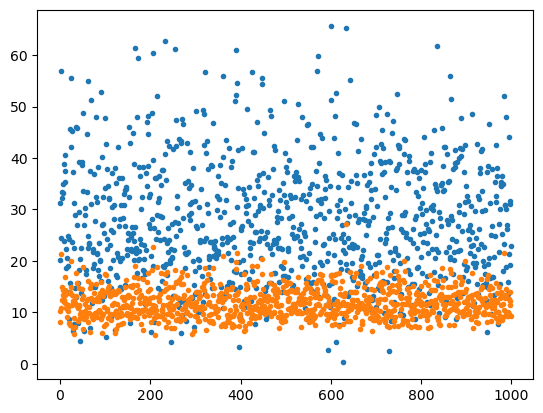

In [8]:
import matplotlib.pyplot as plt
plt.plot(Q,'.'); plt.plot(Rg,'.')

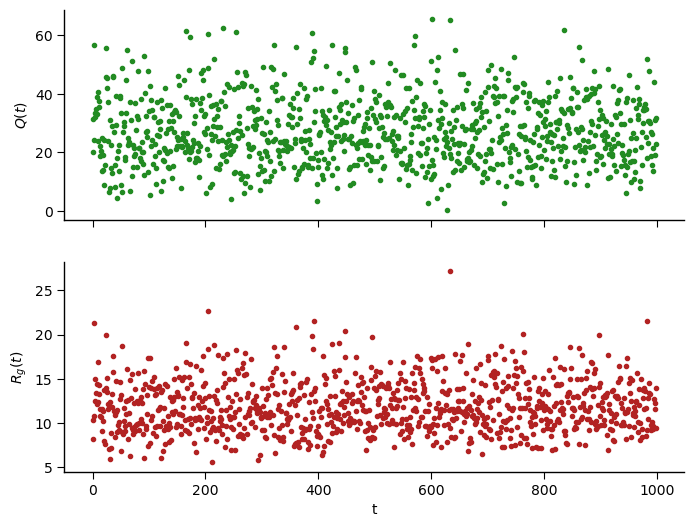

In [9]:
plt.rcParams['figure.figsize']=(8,6)
fig,axs=plt.subplots(2,1,sharex=True)
for ax in axs:
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["top"].set_linewidth(0)
    ax.spines["left"].set_linewidth(1)
    ax.spines["right"].set_linewidth(0)
    ax.grid(False)

# PLOT
axs[0].plot(Q,'.',c='forestgreen',lw=0.5)
axs[1].plot(Rg,'.',c='firebrick',lw=0.5)

# AXES
for ax in axs:
    ax.tick_params(axis='x',length=5)
    ax.tick_params(axis='y',length=5)
axs[1].set_xlabel('t')
axs[0].set_ylabel(r'$Q(t)$')
axs[1].set_ylabel(r'${R_g}(t)$')

plt.show()

*Mean Square*

In [13]:
mQ2_sim=np.mean(np.array(Q)**2)
mQ2_th=N*b*b
print('mQ2 Simulation =',mQ2_sim)
print('mQ2 Theoretical =', mQ2_th)

mQ2 Simulation = 888.6721597540002
mQ2 Theoretical = 900.0


In [14]:
mRg2_sim=np.mean(np.array(Rg)**2)
mRg2_th=N*b*b/6
print('mRG2 simulation',mRg2_sim)
print('mRG2 Theoretical',mRg2_th)

mRG2 simulation 149.65122326898737
mRG2 Theoretical 150.0
